In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import numpy.linalg as linalg
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from networkx.algorithms import bipartite
import sympy as sp

In [2]:
def show_matrix(data):
    min_val, max_val = 0, 15
    cm = sns.light_palette("blue", as_cmap=True)
    x=pd.DataFrame(data)
    x=x.style.background_gradient(cmap=cm)
    display(x)

In [3]:
def calculate_second_egein(norm_Lapl):
    val, vec = np.linalg.eigh(norm_Lapl)
    val = val.real
    vec = vec.real
    idx = np.argsort(val)
    val = val[idx]
    vec = vec[:,idx]
    return val,vec

In [4]:
def create_graph(nodes, edges):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [5]:
def create_random_geometric_graph():
    G = nx.random_geometric_graph(200, 0.125)
    pos = nx.get_node_attributes(G, "pos")

    dmin = 1
    ncenter = 0
    for n in pos:
        x, y = pos[n]
        d = (x - 0.5) ** 2 + (y - 0.5) ** 2
        if d < dmin:
            ncenter = n
            dmin = d

    p = dict(nx.single_source_shortest_path_length(G, ncenter))

    return G, pos, ncenter, p

In [6]:
def show_random_geometrci_graph(G, pos, ncenter, p):
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(p.keys()),
        node_size=80,
        node_color=list(p.values()),
        cmap=plt.cm.Reds_r,
    )

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

In [7]:
def create_and_show_random_geometric_graph():
    G, pos, ncenter, p = create_random_geometric_graph()
    show_random_geometrci_graph(G, pos, ncenter, p)
    return G

In [8]:
def show_graph_with_color(G, colors):
    plt.figure(figsize=(15, 15))
    nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')
    plt.show()

In [9]:
def show_graph(G):
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()

In [10]:
def create_and_show_graph(nodes, edges):
    G = create_graph(nodes, edges)
    show_graph(G)
    return G

In [11]:
def get_not_normal_eigen(L):
    mat = sp.Matrix(L)
    tupels = mat.eigenvects()
    
    values = []
    vectors = []

    for eigen_value, _, eigen_vector in tupels:
        for v in eigen_vector:
            values.append(float(eigen_value))
            _v = []
            for __v in np.array(v).astype(np.float64):
                _v.append(__v[0])
            vectors.append(_v)

    return values, vectors

In [12]:
def get_second_eigen_vector(values, vectors):
    idx = np.argsort(values)
    return vectors[idx[1]]

In [13]:
def create_adjancency_matrix(G):
    return nx.convert_matrix.to_numpy_array(G, dtype=int)

In [14]:
def create_and_show_adjancency_matrix(G):
    A = create_adjancency_matrix(G)
    show_matrix(A)
    return A

In [15]:
def create_degree_matrix(G):
    DergeeList = list(G.degree)
    D = np.zeros((G.number_of_nodes(), G.number_of_nodes()),dtype=int)
    for node in range(len(DergeeList)):
        D[node][node] = DergeeList[node][1]
    return D

In [16]:
def create_and_show_degree_matrix(G):
    D = create_degree_matrix(G)
    show_matrix(D)
    return D

In [17]:
def create_laplacian_matrix(D, A):
    return D - A

In [18]:
def create_and_show_laplacian_matrix(D, A):
    L = create_laplacian_matrix(D, A)
    show_matrix(L)
    return L

In [19]:
def create_graphs_colors(vector, median):
    label_vector = np.zeros(len(vector))
    label_vector[vector>median]=1
    label_vector[vector<median]=0

    color_map = []
    for i in label_vector:
        if i == 0:
            color_map.append('red')
        else:
            color_map.append('green')
    
    return color_map

In [20]:
def show_vector(vector,idx):
    plt.figure()
    x = range(len(vector))
    y = vector
    plt.plot(x,y,marker="o")
    for i,j in zip(x,y):
        plt.annotate(str(x[i]),xy=(i,j),ha='center', va='bottom')
    plt.ylabel("Value of vector "+ str(idx))
    plt.xlabel("Rank of vector " +str(idx))
    plt.show()

In [21]:
def spectral_clustering(G):
    # TODO: 
    # 2. Prety UI = maybe to add all to one canvas

    A = create_and_show_adjancency_matrix(G)
    D = create_and_show_degree_matrix(G)
    Lap = create_and_show_laplacian_matrix(D, A)

    eiegen_vals, eigen_vecs = get_not_normal_eigen(Lap)
    second_vector = get_second_eigen_vector(eiegen_vals, eigen_vecs)
    show_vector(second_vector,2)
    median = np.median(second_vector)

    color_map = create_graphs_colors(second_vector, median)
    show_graph_with_color(G, color_map)

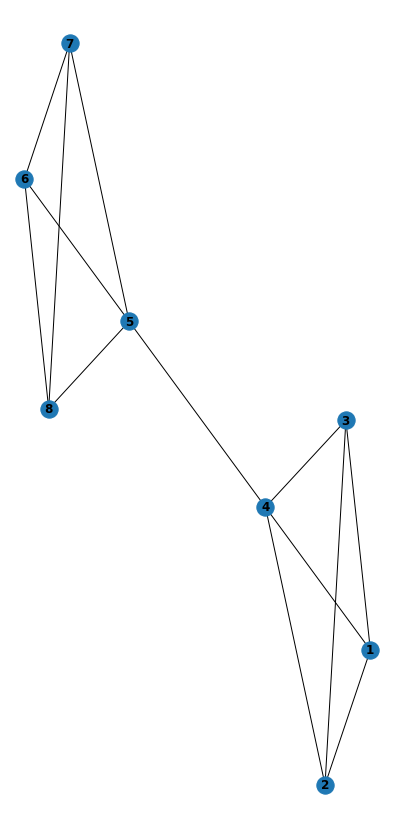

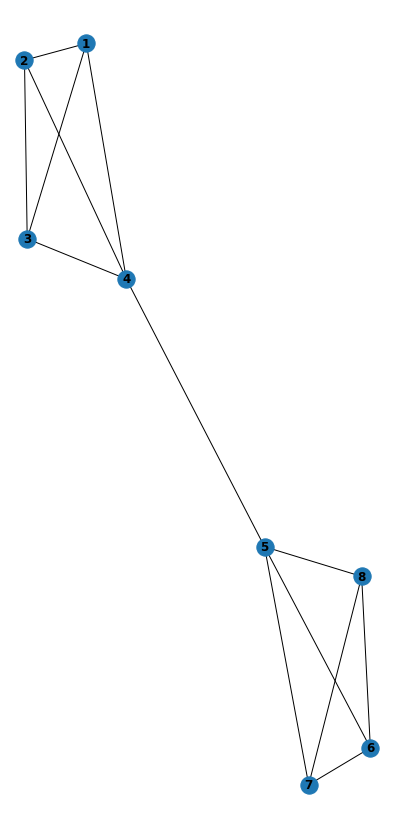

,0,1,2,3,4,5,6,7
0,0,1,1,1,0,0,0,0
1,1,0,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0
3,1,1,1,0,1,0,0,0
4,0,0,0,1,0,1,1,1
5,0,0,0,0,1,0,1,1
6,0,0,0,0,1,1,0,1
7,0,0,0,0,1,1,1,0


,0,1,2,3,4,5,6,7
0,3,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0
3,0,0,0,4,0,0,0,0
4,0,0,0,0,4,0,0,0
5,0,0,0,0,0,3,0,0
6,0,0,0,0,0,0,3,0
7,0,0,0,0,0,0,0,3


,0,1,2,3,4,5,6,7
0,3,-1,-1,-1,0,0,0,0
1,-1,3,-1,-1,0,0,0,0
2,-1,-1,3,-1,0,0,0,0
3,-1,-1,-1,4,-1,0,0,0
4,0,0,0,-1,4,-1,-1,-1
5,0,0,0,0,-1,3,-1,-1
6,0,0,0,0,-1,-1,3,-1
7,0,0,0,0,-1,-1,-1,3


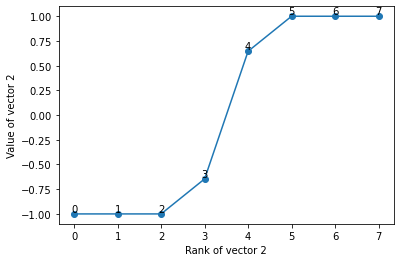

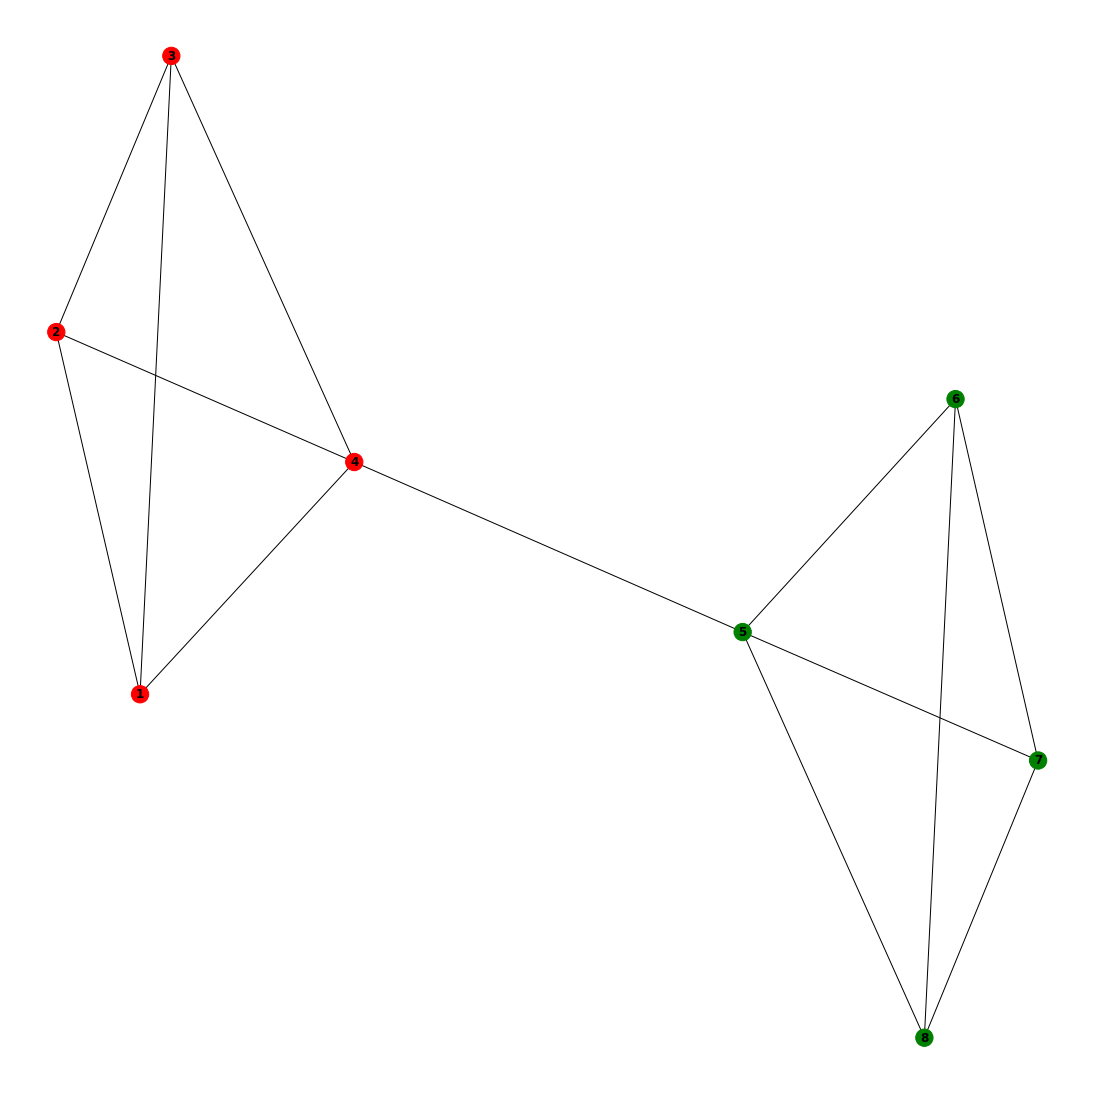

In [22]:
nodes = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (5, 8), (6, 7), (7, 8), (6, 8)]
G = create_and_show_graph(nodes, edges)
spectral_clustering(G)


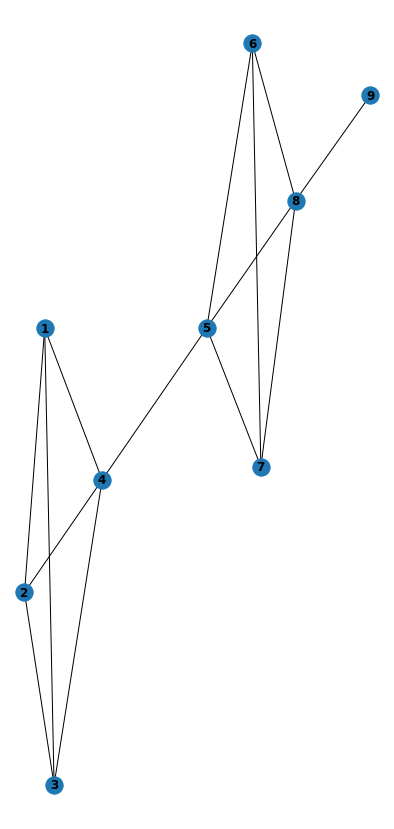

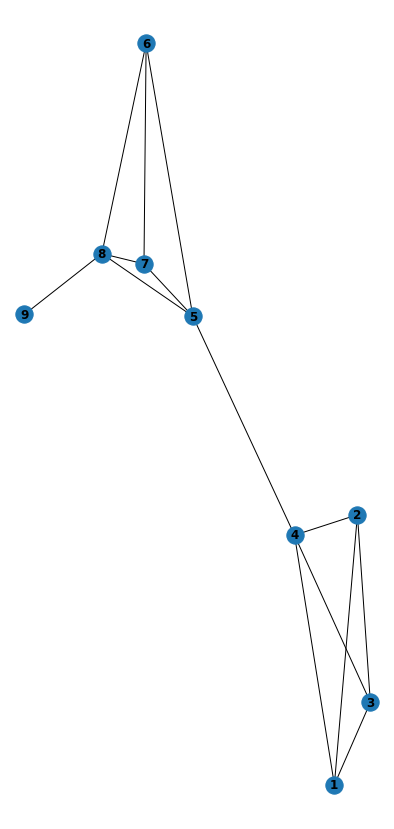

,0,1,2,3,4,5,6,7,8
0,0,1,1,1,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0
3,1,1,1,0,1,0,0,0,0
4,0,0,0,1,0,1,1,1,0
5,0,0,0,0,1,0,1,1,0
6,0,0,0,0,1,1,0,1,0
7,0,0,0,0,1,1,1,0,1
8,0,0,0,0,0,0,0,1,0


,0,1,2,3,4,5,6,7,8
0,3,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0
4,0,0,0,0,4,0,0,0,0
5,0,0,0,0,0,3,0,0,0
6,0,0,0,0,0,0,3,0,0
7,0,0,0,0,0,0,0,4,0
8,0,0,0,0,0,0,0,0,1


,0,1,2,3,4,5,6,7,8
0,3,-1,-1,-1,0,0,0,0,0
1,-1,3,-1,-1,0,0,0,0,0
2,-1,-1,3,-1,0,0,0,0,0
3,-1,-1,-1,4,-1,0,0,0,0
4,0,0,0,-1,4,-1,-1,-1,0
5,0,0,0,0,-1,3,-1,-1,0
6,0,0,0,0,-1,-1,3,-1,0
7,0,0,0,0,-1,-1,-1,4,-1
8,0,0,0,0,0,0,0,-1,1


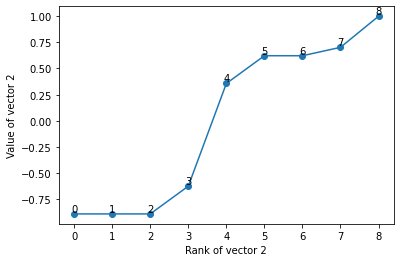

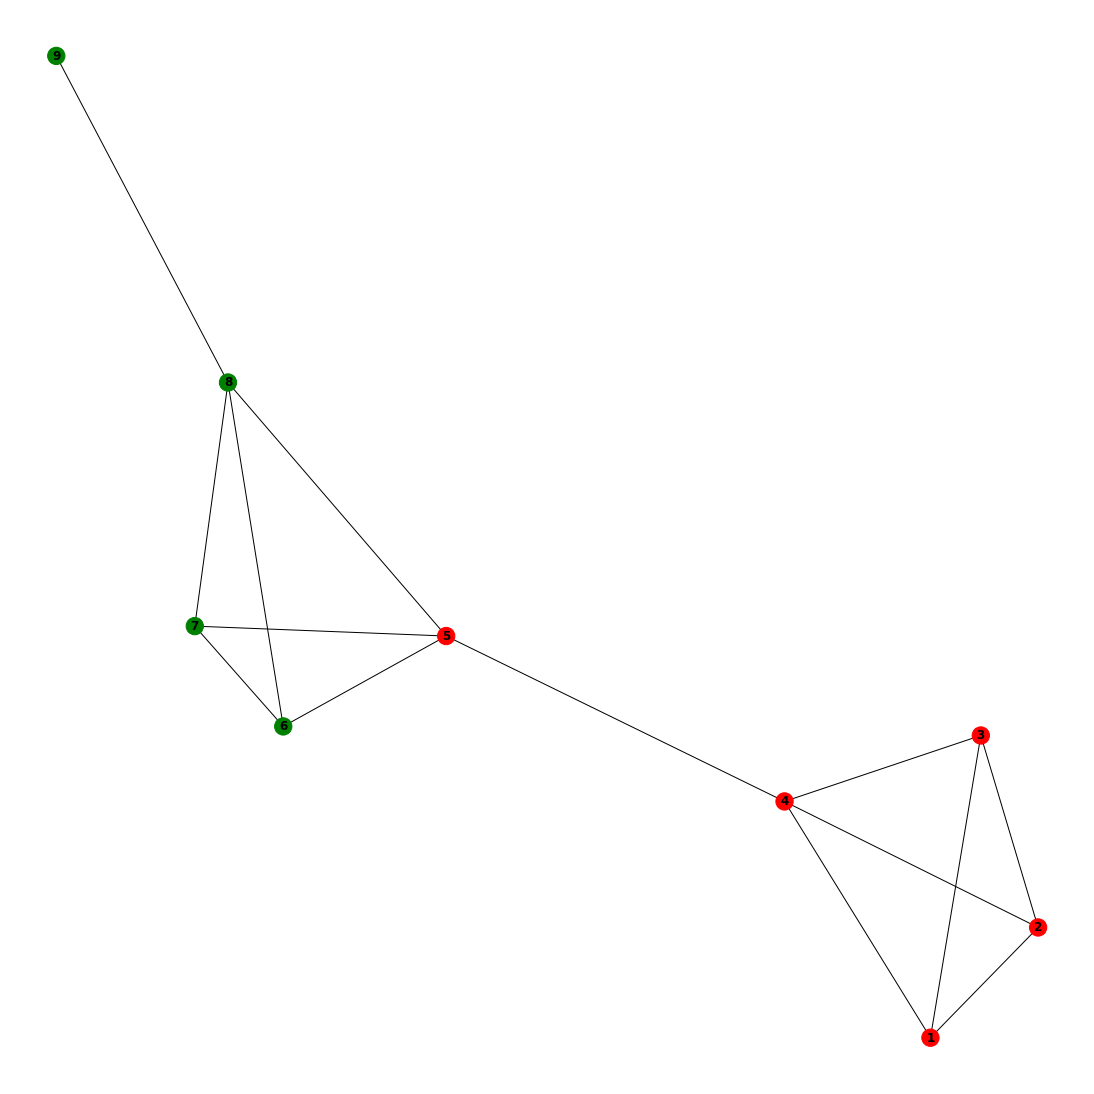

In [23]:
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (5, 8), (6, 7), (7, 8), (6, 8), (9, 8)]
G = create_and_show_graph(nodes, edges)
spectral_clustering(G)